In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.columns = ['CustomerID', 'Genre', 'Age', 'Income','Spending']

In [5]:
df.head(5)

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = df[['Income','Spending']]
x.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


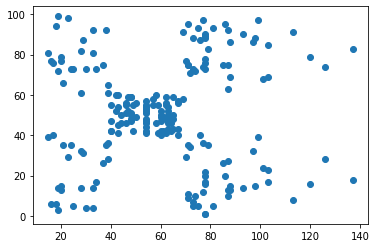

In [7]:
plt.scatter(x['Income'],x['Spending'])

In [8]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=8)
model.fit(x)
cluster = model.predict(x)

In [10]:
cluster

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

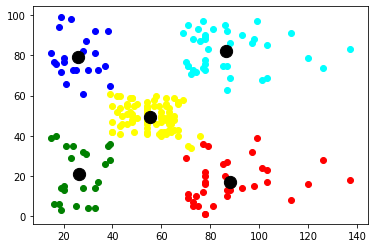

In [11]:
plt.scatter(x[cluster==0]['Income'],x[cluster==0]['Spending'],c='red')
plt.scatter(x[cluster==1]['Income'],x[cluster==1]['Spending'],c='blue')
plt.scatter(x[cluster==2]['Income'],x[cluster==2]['Spending'],c='yellow')
plt.scatter(x[cluster==3]['Income'],x[cluster==3]['Spending'],c='cyan')
plt.scatter(x[cluster==4]['Income'],x[cluster==4]['Spending'],c='green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=150)

In [12]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [27]:
model.inertia_                #sum of d^2

24986.52564064288

In [32]:
WCSS=[]
for i in range (1,11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    WCSS.append(model.inertia_)

In [33]:
WCSS

[269981.28,
 183257.86154461786,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30227.606513152015,
 25031.418952745145,
 21913.929201194416,
 19669.710998301216]

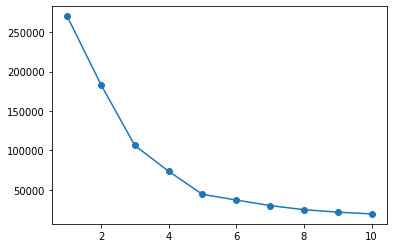

In [35]:
plt.plot((range(1,11)),WCSS,marker='o')